# Variable transformers : BoxCoxTransformer

The BoxCoxTransformer() applies the BoxCox transformation to numerical
variables.

The Box-Cox transformation is defined as:

- T(Y)=(Y exp(λ)−1)/λ if λ!=0
- log(Y) otherwise

where Y is the response variable and λ is the transformation parameter. λ varies,
typically from -5 to 5. In the transformation, all values of λ are considered and
the optimal value for a given variable is selected.

**For this demonstration, we use the Ames House Prices dataset produced by Professor Dean De Cock:**

Dean De Cock (2011) Ames, Iowa: Alternative to the Boston Housing
Data as an End of Semester Regression Project, Journal of Statistics Education, Vol.19, No. 3

http://jse.amstat.org/v19n3/decock.pdf

https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627

The version of the dataset used in this notebook can be obtained from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from feature_engine.imputation import ArbitraryNumberImputer, CategoricalImputer
from feature_engine.transformation import BoxCoxTransformer

In [2]:
#Read data
data = pd.read_csv('houseprice.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['Id', 'SalePrice'], axis=1), data['SalePrice'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((1022, 79), (438, 79))

In [4]:
# let's transform 2 variables

bct = BoxCoxTransformer(variables = ['LotArea', 'GrLivArea'])

# find the optimal lambdas 
bct.fit(X_train)

BoxCoxTransformer(variables=['LotArea', 'GrLivArea'])

In [5]:
# these are the exponents for the BoxCox transformation

bct.lambda_dict_

{'LotArea': 0.022716974992922984, 'GrLivArea': 0.06854346283829917}

In [6]:
# transfor the variables

train_t = bct.transform(X_train)
test_t = bct.transform(X_test)

Text(0.5, 0, 'GrLivArea')

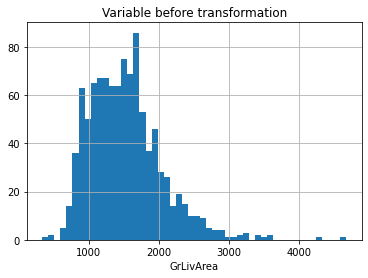

In [7]:
# variable before transformation
X_train['GrLivArea'].hist(bins=50)
plt.title('Variable before transformation')
plt.xlabel('GrLivArea')

Text(0.5, 0, 'GrLivArea')

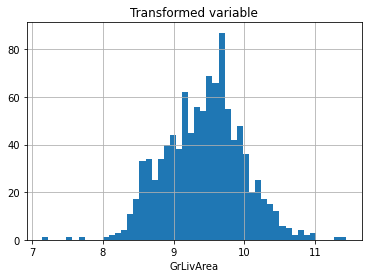

In [8]:
# transformed variable
train_t['GrLivArea'].hist(bins=50)
plt.title('Transformed variable')
plt.xlabel('GrLivArea')

Text(0.5, 0, 'LotArea')

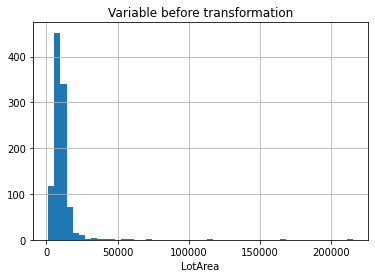

In [9]:
# tvariable before transformation
X_train['LotArea'].hist(bins=50)
plt.title('Variable before transformation')
plt.xlabel('LotArea')

Text(0.5, 0, 'LotArea')

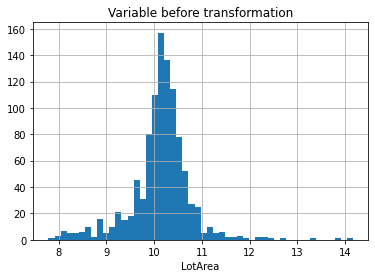

In [10]:
# transformed variable
train_t['LotArea'].hist(bins=50)
plt.title('Variable before transformation')
plt.xlabel('LotArea')

## Automatically select numerical variables

The transformer will transform all numerical variables if no variables are specified.

In [11]:
# load numerical variables only

variables = ['LotFrontage', 'LotArea',
             '1stFlrSF', 'GrLivArea',
             'TotRmsAbvGrd', 'SalePrice']

data = pd.read_csv('houseprice.csv', usecols=variables)

In [12]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['SalePrice'], axis=1), data['SalePrice'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((1022, 5), (438, 5))

In [13]:
# Impute missing values

arbitrary_imputer = ArbitraryNumberImputer(arbitrary_number=2)

arbitrary_imputer.fit(X_train)

# impute variables
train_t = arbitrary_imputer.transform(X_train)
test_t = arbitrary_imputer.transform(X_test)

In [14]:
# let's transform all numerical variables

bct = BoxCoxTransformer()

bct.fit(train_t)

BoxCoxTransformer()

In [15]:
# variables that will be transformed

bct.variables_

['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'TotRmsAbvGrd']

In [16]:
# transform  variables
train_t = bct.transform(train_t)
test_t = bct.transform(test_t)

In [17]:
# learned parameters

bct.lambda_dict_

{'LotFrontage': 0.7837538110249009,
 'LotArea': 0.022716974992922984,
 '1stFlrSF': 0.024760203538733927,
 'GrLivArea': 0.06854346283829917,
 'TotRmsAbvGrd': 0.26841547941861493}